In [79]:
import numpy as np
import matplotlib.pyplot as plt
import myAdaBoost as adab
from utils import plot, npmap

In [80]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
plt.rcParams["figure.figsize"] = 10, 8

# Dummy data set

In [82]:
dataset, labels = adab.load_data_set()

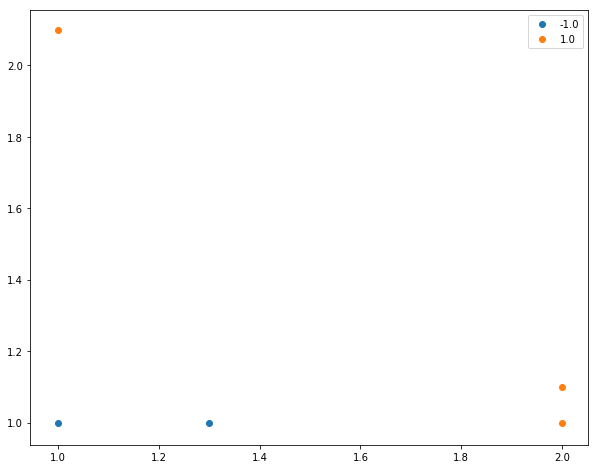

In [83]:
plot(dataset, labels)

In [84]:
adab.stump(dataset, labels, np.ones_like(labels)/labels.size)

{'comparator': <ufunc 'less_equal'>,
 'error': 0.20000000000000001,
 'feature': 0,
 'prediction': array([-1,  1, -1, -1,  1]),
 'threshold': 1.3}

In [85]:
classifier_params = adab.train_adaboost(dataset, labels, 0, 11, 30)
classifier_params

[{'alpha': 0.69314718055994529,
  'comparator': <ufunc 'less_equal'>,
  'error': 0.20000000000000001,
  'feature': 0,
  'prediction': array([-1,  1, -1, -1,  1]),
  'threshold': 1.3},
 {'alpha': 0.9729550745276565,
  'comparator': <ufunc 'less_equal'>,
  'error': 0.12500000000000003,
  'feature': 1,
  'prediction': array([ 1,  1, -1, -1, -1]),
  'threshold': 1.0},
 {'alpha': 0.89587973461402726,
  'comparator': <ufunc 'greater'>,
  'error': 0.1428571428571429,
  'feature': 0,
  'prediction': array([1, 1, 1, 1, 1]),
  'threshold': 2.0}]

In [86]:
classifier = adab.get_classifier(classifier_params)

In [87]:
classifier(np.array([[i]*2 for i in range(6)]))

array([-1., -1.,  1.,  1.,  1.,  1.])

# Horse colic data set

26.865671641791046
22.388059701492537
23.880597014925375
20.895522388059703
22.388059701492537
20.895522388059703
22.388059701492537
22.388059701492537
23.880597014925375
32.83582089552239


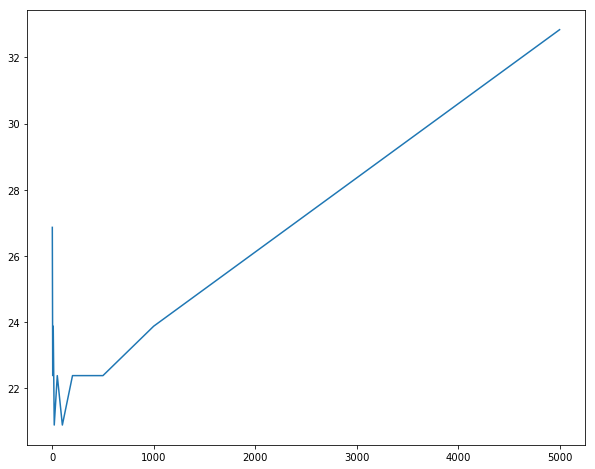

In [90]:
its = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000]
error_rate = [adab.test_horse_colic(max_error=1e-6, nsteps=10, max_iterations=it) for it in its]
plt.plot(its, error_rate)

26.865671641791046
26.865671641791046
23.880597014925375
23.880597014925375
25.37313432835821
26.865671641791046
25.37313432835821
23.880597014925375
22.388059701492537
23.880597014925375
20.895522388059703
22.388059701492537
22.388059701492537
20.895522388059703
20.895522388059703
22.388059701492537
22.388059701492537
20.895522388059703
20.895522388059703
22.388059701492537
20.895522388059703
22.388059701492537
20.895522388059703
20.895522388059703
20.895522388059703
20.895522388059703
19.402985074626866
22.388059701492537
19.402985074626866
20.895522388059703
22.388059701492537
22.388059701492537
22.388059701492537
22.388059701492537
20.895522388059703
22.388059701492537
19.402985074626866
20.895522388059703
19.402985074626866
19.402985074626866
19.402985074626866
19.402985074626866
19.402985074626866
19.402985074626866
20.895522388059703
20.895522388059703
20.895522388059703
20.895522388059703
20.895522388059703
22.388059701492537
22.388059701492537
25.37313432835821


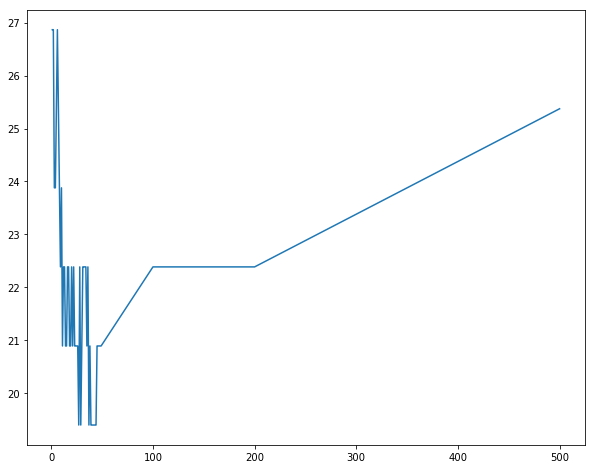

In [95]:
its = np.arange(1,50).tolist() + [100, 200, 500]
error_rate = [adab.test_horse_colic(max_error=0, nsteps=11, max_iterations=it) for it in its]
plt.plot(its, error_rate)